# IESET Y FP
# Materia: Práctica Prfesionalizante
# Profesor: Rios Lucas
# Tema: Modelos de Aprendizaje Automatico No Supervisados
# Profesor: Rios Lucas
# Alumnos: Santágata Julián, Quiñonez Emanuel, Godoy Mapik, Rivero Sebastián

# Definimos un objeto nuevo (Nuevo Paciente)

In [ ]:


#nuevo paciente
edad = 30 # @param {"type":"integer","placeholder":"13"}
genero = 0 # @param {"type":"slider","min":0,"max":1,"step":1}
dolorpecho = 0 # @param {"type":"slider","min":0,"max":2,"step":1}
presionreposo = 160 # @param {"type":"slider","min":0,"max":200,"step":1}
colesterol = 161 # @param {"type":"slider","min":0,"max":700,"step":1}
glucemiaAyuna = 1 # @param {"type":"slider","min":0,"max":1,"step":1}
electrocardiogramaRep = 2 # @param {"type":"slider","min":0,"max":2,"step":1}
freqMaxCardiaca = 185 # @param {"type":"slider","min":0,"max":250,"step":1}
anginaEjerc = 0 # @param {"type":"slider","min":0,"max":1,"step":1}
descenSegST = 3 # @param {"type":"slider","min":0,"max":10,"step":0.1}
pendienteST = 0 # @param {"type":"slider","min":0,"max":3,"step":1}
nrovasos = 0 # @param {"type":"slider","min":0,"max":3,"step":1}
#diagnostico = 0 # @param {"type":"slider","min":0,"max":1,"step":1}


In [ ]:
nuevo_paciente = [[
    edad,
    genero,
    dolorpecho,
    presionreposo,
    colesterol,
    glucemiaAyuna,
    electrocardiogramaRep,
    freqMaxCardiaca,
    anginaEjerc,
    descenSegST,
    pendienteST,
    nrovasos
]]

# Dataset


In [ ]:
import pandas as pd
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


#matriz
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

#modelos
from sklearn.cluster import KMeans


# Cargar el dataset
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

X = df.drop(columns=["patientid", "target"], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-Means (escalado)


In [ ]:
scaled_modelo = KMeans(n_clusters=2, random_state=43, n_init=17)

inicio = time.time()
scaled_modelo.fit(X_scaled)
fin = time.time()
print(f"Tiempo de entrenamiento: {(fin - inicio):.4f} segundos")

Tiempo de entrenamiento: 0.0644 segundos


In [ ]:
df["Cluster"] = scaled_modelo.labels_
print("\nPrimeros 10 pacientes con su cluster asignado:")
print(df[["patientid", "Cluster"]])


Primeros 10 pacientes con su cluster asignado:
     patientid  Cluster
0       103368        1
1       119250        0
2       119372        0
3       132514        1
4       146211        1
..         ...      ...
995    9949544        1
996    9953423        1
997    9965859        1
998    9988507        1
999    9990855        0

[1000 rows x 2 columns]


In [ ]:
cluster_map = {
    0: "No enfermo",
    1: "Enfermo",
}

In [ ]:
prediccion = scaled_modelo.predict(nuevo_paciente)
print(f"Predicción Diagnóstico: {cluster_map[prediccion[0]]}")

Predicción Diagnóstico: Enfermo


## Gráfico

In [ ]:
cluster_map = {
    0: "No enfermo",
    1: "Enfermo",

}
df["ClusterLabel"] = df["Cluster"].map(cluster_map)


counts = df["ClusterLabel"].value_counts()


In [ ]:
feature_names = X.columns.tolist()


nuevo_paciente_df = pd.DataFrame(nuevo_paciente, columns=feature_names)

nuevo_paciente_scaled_predict = scaler.transform(nuevo_paciente_df)

prediccion=scaled_modelo.predict(nuevo_paciente_scaled_predict)
print("Diagnóstico predicho:", prediccion[0])

Diagnóstico predicho: 0


###PCA

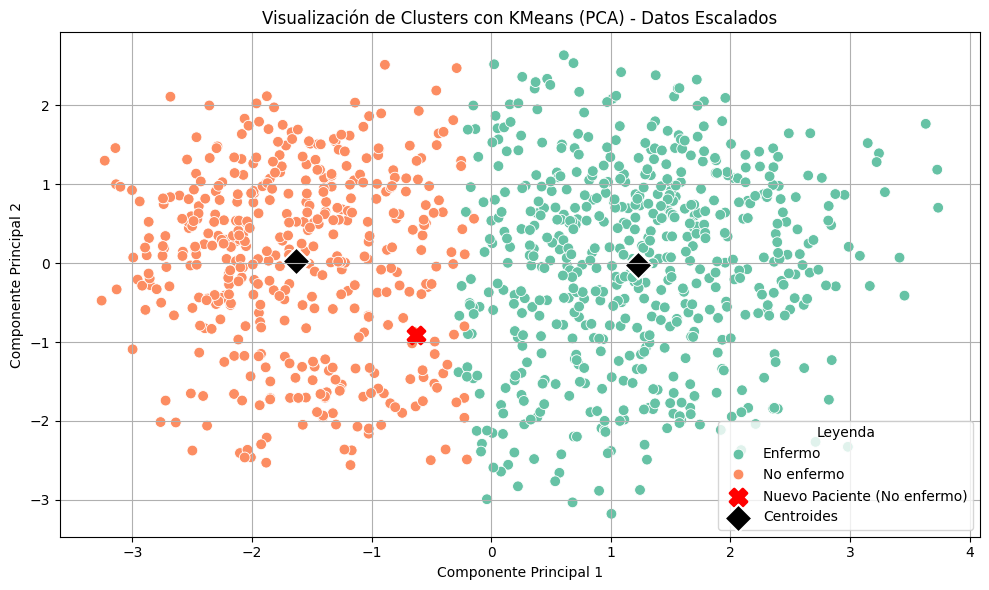

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

nuevo_paciente_scaled = scaler.transform(nuevo_paciente_df)

nuevo_paciente_pca = pca.transform(nuevo_paciente_scaled)

centroids_pca = pca.transform(scaled_modelo.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["ClusterLabel"], palette="Set2", s=60)


plt.scatter(
    nuevo_paciente_pca[:, 0], nuevo_paciente_pca[:, 1],
    color='red', s=150,
    label=f'Nuevo Paciente ({cluster_map[prediccion[0]]})',
    marker='X',
    linewidth=2
)

plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    color='black', s=200,
    label='Centroides',
    marker='D',
    edgecolor='white',
    linewidth=1.5
)

plt.title("Visualización de Clusters con KMeans (PCA) - Datos Escalados")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Leyenda")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# You can adjust these values to set the desired scale
x_min, x_max = X[x_var].min() - 10, X[x_var].max() + 10
y_min, y_max = X[y_var].min() - 10, X[y_var].max() + 10

print(f"X-axis limits: ({x_min}, {x_max})")
print(f"Y-axis limits: ({y_min}, {y_max})")

X-axis limits: (-10, 612)
Y-axis limits: (61, 212)


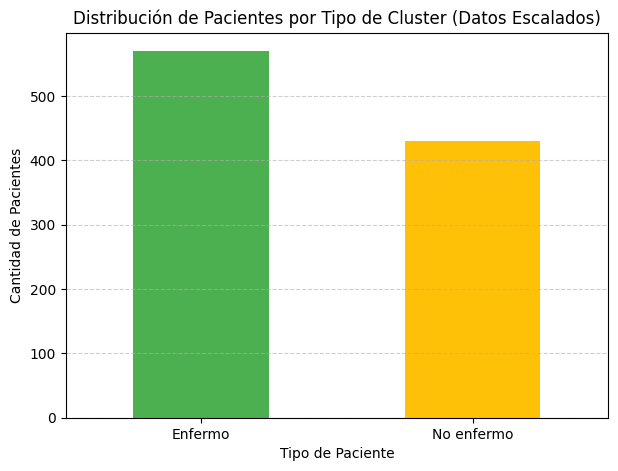

In [ ]:
# Graficar
counts_scaled = df["ClusterLabel"].value_counts()

plt.figure(figsize=(7,5))
counts_scaled.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title("Distribución de Pacientes por Tipo de Cluster (Datos Escalados)")
plt.xlabel("Tipo de Paciente")
plt.ylabel("Cantidad de Pacientes")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#K-Means (No Escalado)


In [ ]:

modelo = KMeans(n_clusters=2, random_state=43, n_init=17)


inicio = time.time()
modelo.fit(X)
fin = time.time()
print(f"Tiempo de entrenamiento: {(fin - inicio):.4f} segundos")

Tiempo de entrenamiento: 0.0309 segundos


In [ ]:
df["Cluster_Unscaled"] = modelo.labels_


print("\nPrimeros 10 pacientes con su cluster asignado (Unscaled Data):")
print(df[["patientid", "Cluster_Unscaled"]])


Primeros 10 pacientes con su cluster asignado (Unscaled Data):
     patientid  Cluster_Unscaled
0       103368                 0
1       119250                 0
2       119372                 0
3       132514                 0
4       146211                 0
..         ...               ...
995    9949544                 1
996    9953423                 0
997    9965859                 1
998    9988507                 1
999    9990855                 0

[1000 rows x 2 columns]


In [ ]:
df["Cluster_Unscaled"] = modelo.labels_
df["ClusterLabel_Unscaled"] = df["Cluster_Unscaled"].map(cluster_map)

feature_names = X.columns.tolist()

nuevo_paciente_df = pd.DataFrame(nuevo_paciente, columns=feature_names)

prediccion_noescalado = modelo.predict(nuevo_paciente_df)

print(f"Nuevo paciente predicción no escalado: {cluster_map[prediccion_noescalado[0]]}")

Nuevo paciente predicción no escalado: No enfermo


In [ ]:
crosstab_kmeans_unscaled = pd.crosstab(df['target'], modelo.labels_)

cluster_to_target_kmeans_unscaled = crosstab_kmeans_unscaled.idxmax(axis=0)
df['Predicted_Target_KMeans_Unscaled'] = df['Cluster_Unscaled'].map(cluster_to_target_kmeans_unscaled)


accuracy_kmeans_unscaled = accuracy_score(df['target'], df['Predicted_Target_KMeans_Unscaled'])
print(f"Precisión (KMeans No Escalado, mapeada al target): {accuracy_kmeans_unscaled:.4f}")

ari_kmeans_unscaled = adjusted_rand_score(df['target'], modelo.labels_)
print(f"Índice Rand Ajustado (ARI) (KMeans No Escalado): {ari_kmeans_unscaled:.4f}")

print("\nMatriz de Confusión (KMeans No Escalado mapeado a Target):")
print(confusion_matrix(df['target'], df['Predicted_Target_KMeans_Unscaled']))

Precisión (KMeans No Escalado, mapeada al target): 0.5890
Índice Rand Ajustado (ARI) (KMeans No Escalado): 0.0307

Matriz de Confusión (KMeans No Escalado mapeado a Target):
[[242 178]
 [233 347]]


## Gráfico

In [ ]:
# Asignar significado manual a cada cluster
cluster_map = {
    0: "No enfermo",
    1: "Enfermo",
}
df["ClusterLabel"] = df["Cluster"].map(cluster_map)

# Contar cantidad de pacientes por categoría
counts = df["ClusterLabel"].value_counts()


###PCA

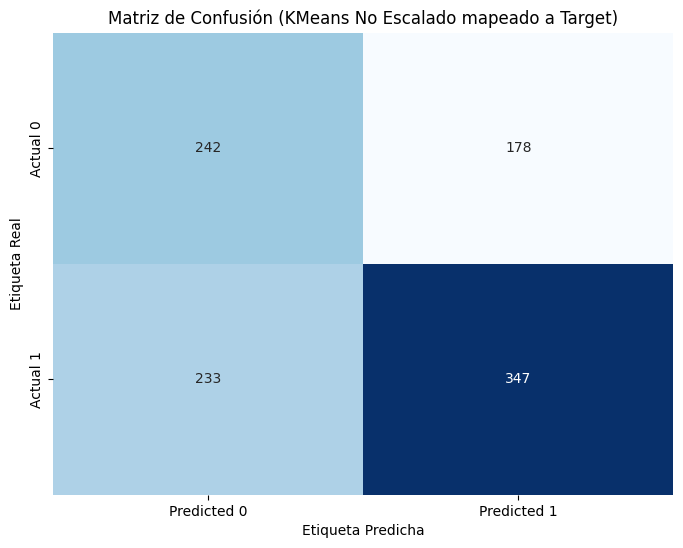

In [ ]:
# Mostrar la matriz de confusión para los clusters mapeados del KMeans No Escalado (gráfico)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(df['target'], df['Predicted_Target_KMeans_Unscaled']), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión (KMeans No Escalado mapeado a Target)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

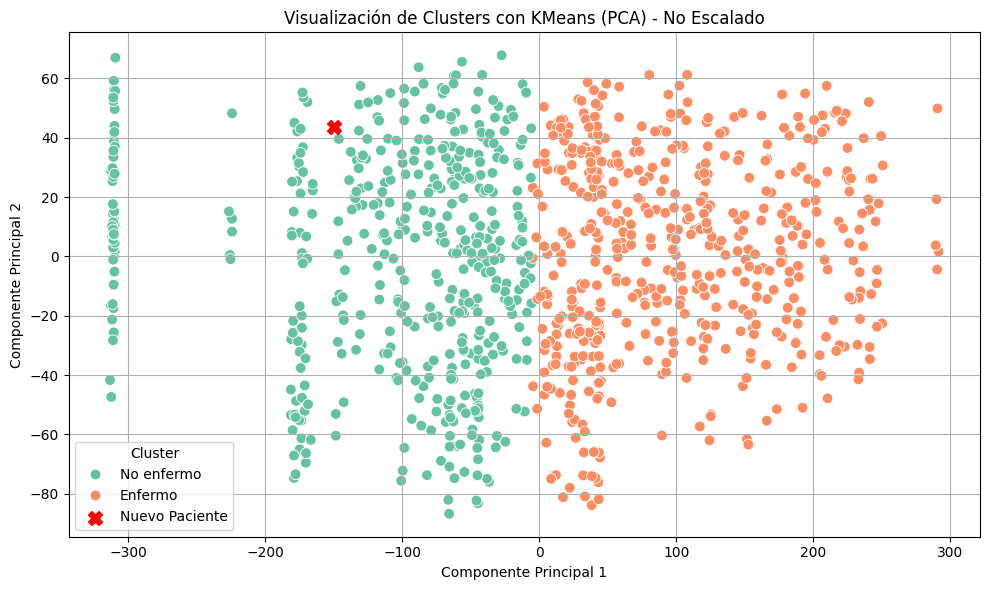

In [ ]:
# Reducir a 2 dimensiones para graficar

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scale the new patient data using the same scaler
nuevo_paciente_noescalado = nuevo_paciente_df

# Apply PCA to the new patient data
nuevo_paciente_pca = pca.transform(nuevo_paciente_noescalado)

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster_Unscaled"].map(cluster_map), palette="Set2", s=60)

# Add the new patient data point to the plot
plt.scatter(nuevo_paciente_pca[:, 0], nuevo_paciente_pca[:, 1], color='red', s=100, label='Nuevo Paciente', marker='X')

plt.title("Visualización de Clusters con KMeans (PCA) - No Escalado")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
min_maxheartrate = X['maxheartrate'].min()
max_maxheartrate = X['maxheartrate'].max()
min_serumcholestrol = X['serumcholestrol'].min()
max_serumcholestrol = X['serumcholestrol'].max()

print(f"Minimum maxheartrate: {min_maxheartrate}")
print(f"Maximum maxheartrate: {max_maxheartrate}")
print(f"Minimum serumcholestrol: {min_serumcholestrol}")
print(f"Maximum serumcholestrol: {max_serumcholestrol}")

Minimum maxheartrate: 71
Maximum maxheartrate: 202
Minimum serumcholestrol: 0
Maximum serumcholestrol: 602


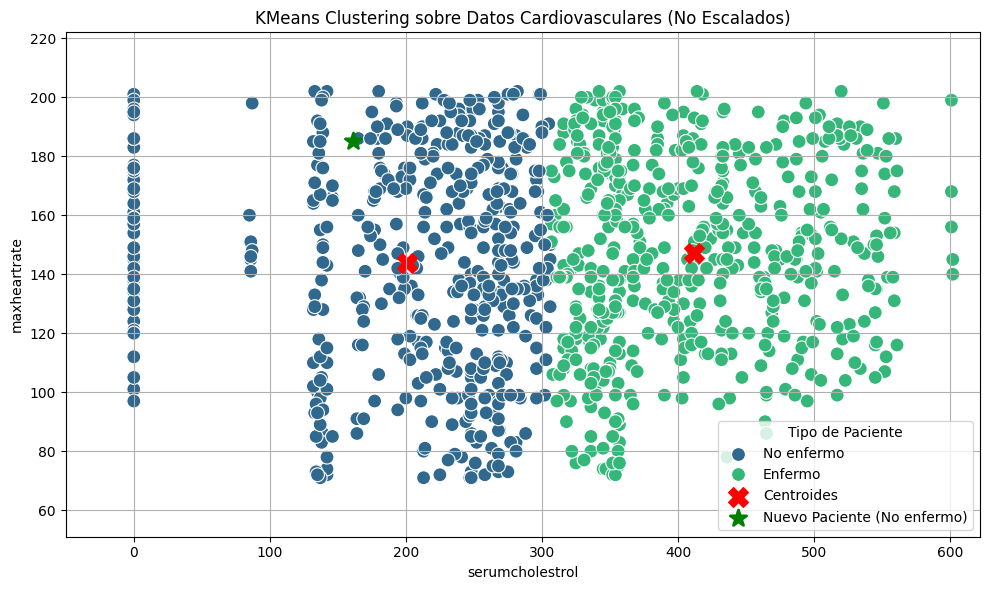

In [ ]:
# Cambiar variables para graficar
x_var = "serumcholestrol"
y_var = "maxheartrate"

# Predict the cluster for the unscaled new patient using the DataFrame
prediccion_unscaled = modelo.predict(nuevo_paciente_df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[x_var], y=X[y_var], hue=df["ClusterLabel_Unscaled"], palette="viridis", s=100) # Data points

# Add unscaled cluster centroids
plt.scatter(modelo.cluster_centers_[:, X.columns.get_loc(x_var)], modelo.cluster_centers_[:, X.columns.get_loc(y_var)],
            marker="X", s=200, c="red", label="Centroides")

# Add the unscaled new patient data point
plt.scatter(
    nuevo_paciente_df[x_var],
    nuevo_paciente_df[y_var],
    color='green', s=150,
    label=f'Nuevo Paciente ({cluster_map[prediccion_unscaled[0]]})',
    marker='*', # Use a distinct marker for the new patient
    linewidth=2
)

plt.title("KMeans Clustering sobre Datos Cardiovasculares (No Escalados)")
plt.xlabel(f"{x_var}")
plt.ylabel(f"{y_var}")
plt.xlim(min_serumcholestrol - 50, max_serumcholestrol + 20)
plt.ylim(min_maxheartrate - 20, max_maxheartrate + 20)
plt.legend(title="Tipo de Paciente")
plt.grid(True)
plt.tight_layout()
plt.show()

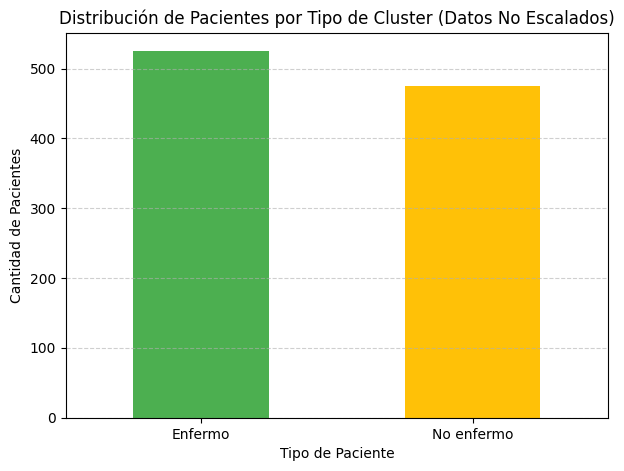

In [ ]:
counts_unscaled = df["ClusterLabel_Unscaled"].value_counts()

plt.figure(figsize=(7,5))
counts_unscaled.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title("Distribución de Pacientes por Tipo de Cluster (Datos No Escalados)")
plt.xlabel("Tipo de Paciente")
plt.ylabel("Cantidad de Pacientes")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Hierarchical Clustering (Escalado)

In [ ]:
modelo_h = AgglomerativeClustering(n_clusters=2,linkage='ward' )

inicio = time.time()
modelo_h.fit(X_scaled)
fin = time.time()
print(f"Tiempo de entrenamiento: {(fin - inicio):.4f} segundos")

Tiempo de entrenamiento: 0.0568 segundos


In [ ]:
df["Cluster_H"] = modelo_h.labels_
print("\nPrimeros 10 pacientes con su cluster asignado:")
print(df[["patientid", "Cluster_H"]])


Primeros 10 pacientes con su cluster asignado:
     patientid  Cluster_H
0       103368          0
1       119250          1
2       119372          0
3       132514          0
4       146211          0
..         ...        ...
995    9949544          0
996    9953423          0
997    9965859          0
998    9988507          0
999    9990855          1

[1000 rows x 2 columns]


In [ ]:
# Crear una tabla de contingencia de la variable target original y las etiquetas de cluster
crosstab_h = pd.crosstab(df['target'], modelo_h.labels_)

# Determinar la correspondencia de la etiqueta del cluster a la etiqueta del target
cluster_to_target_h = crosstab_h.idxmax(axis=0)
df['Predicted_Target_H'] = df['Cluster_H'].map(cluster_to_target_h)

# Calcular una medida similar a la precisión (accuracy)
accuracy_h = accuracy_score(df['target'], df['Predicted_Target_H'])
print(f"Precisión (mapeada al target): {accuracy_h:.4f}")

# Un valor de 1.0 significa que las particiones son idénticas
# Un valor de 0.0 significa que las particiones son aleatorias.
ari_h = adjusted_rand_score(df['target'], modelo_h.labels_)
print(f"Índice Rand Ajustado (ARI): {ari_h:.4f}")

# Mostrar la matriz de confusión para los clusters mapeados
print("\nMatriz de Confusión (Clustering Jerárquico mapeado a Target):")
print(confusion_matrix(df['target'], df['Predicted_Target_H']))

Precisión (mapeada al target): 0.8490
Índice Rand Ajustado (ARI): 0.4849

Matriz de Confusión (Clustering Jerárquico mapeado a Target):
[[291 129]
 [ 22 558]]


# Gráficos

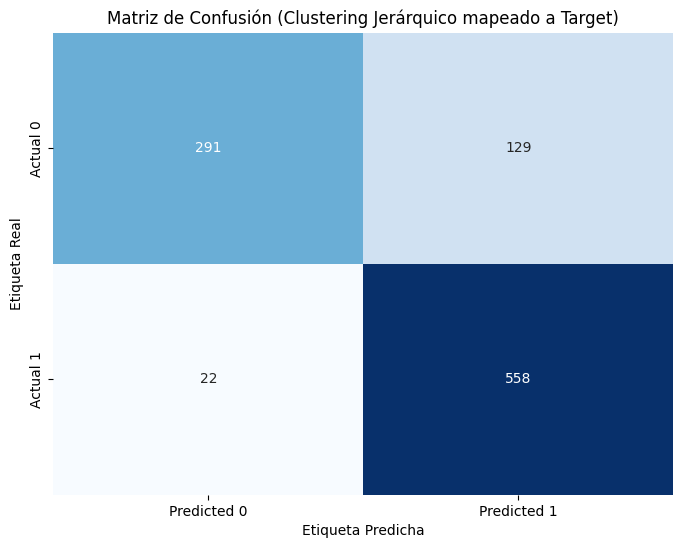

In [ ]:
# Mostrar la matriz de confusión para los clusters mapeados (gráfico)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(df['target'], df['Predicted_Target_H']), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Matriz de Confusión (Clustering Jerárquico mapeado a Target)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

In [ ]:
cluster_map_h = {
    0: "No enfermo",
    1: "Enfermo",
}
df['clusterlabel_h'] = df["Cluster_H"].map(cluster_map_h)

#Contar cantidad de pacientes
counts_h = df['clusterlabel_h'].value_counts()

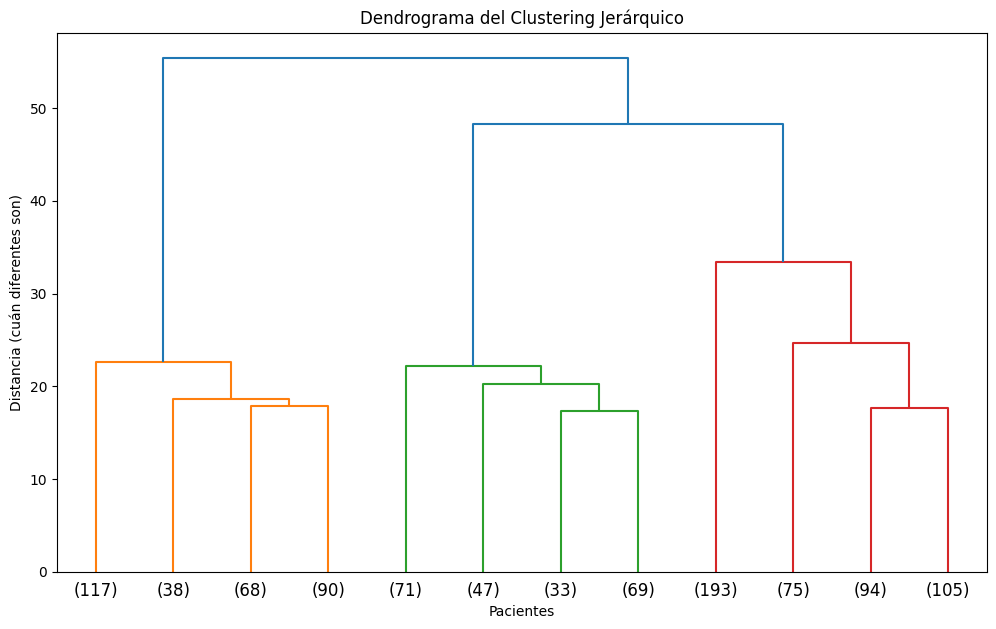

In [ ]:
#Esto genera los datos para el gráfico del árbol
Z = linkage(X_scaled, method='ward')

#Grafico del dendrograma
plt.figure(figsize=(12, 7))
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Pacientes')
plt.ylabel('Distancia (cuán diferentes son)')

# 'truncate_mode='lastp'' y 'p=12' es para no mostrar los 1000 pacientes,
# sino solo las últimas 12 "uniones" (si no, el gráfico es ilegible, xd)
dendrogram(Z,
           truncate_mode='lastp',  # Muestra solo las últimas 'p' uniones
           p=12,                   # Número de uniones a mostrar
           show_leaf_counts=True,  # Muestra cuántos pacientes hay en cada hoja
           leaf_font_size=12.)

plt.show()

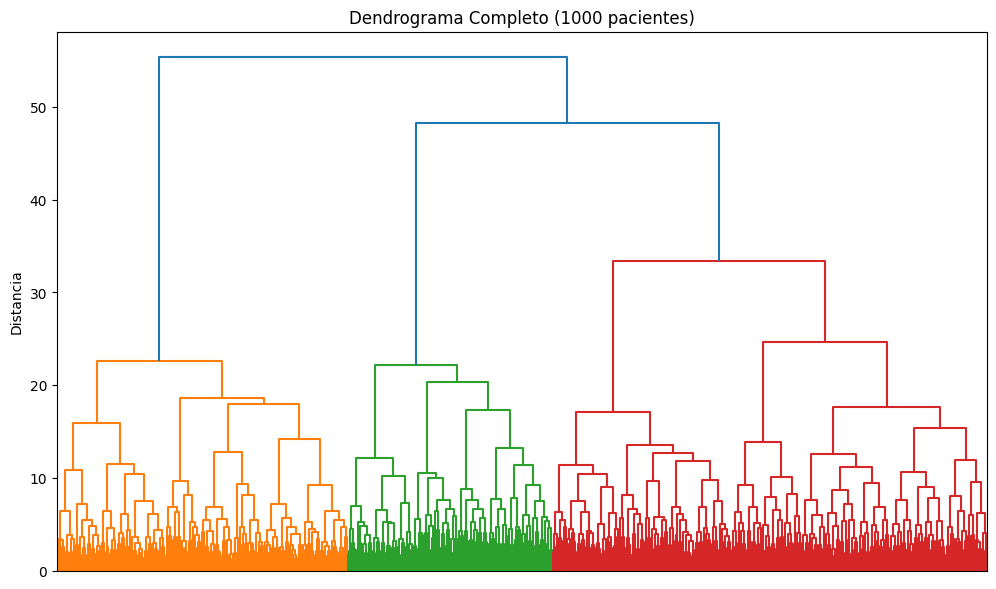

In [ ]:
#Esto genera los datos para el gráfico del árbol
Z = linkage(X_scaled, method='ward')

#Graficar los 1000
plt.figure(figsize=(12, 7))
plt.title('Dendrograma Completo (1000 pacientes)')
plt.ylabel('Distancia')

dendrogram(Z,
           no_labels=True)

plt.show()

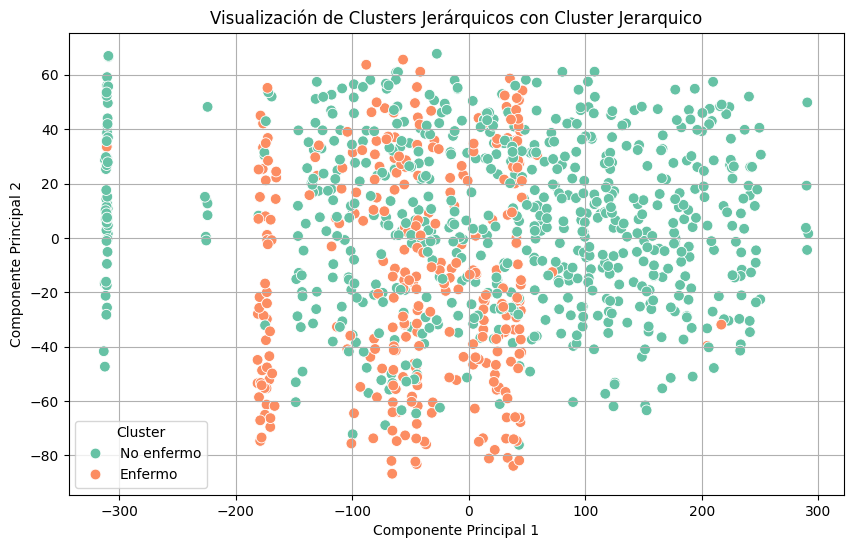

In [ ]:
#Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["clusterlabel_h"],
    palette="Set2",
    s=60
)

plt.title('Visualización de Clusters Jerárquicos con Cluster Jerarquico')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

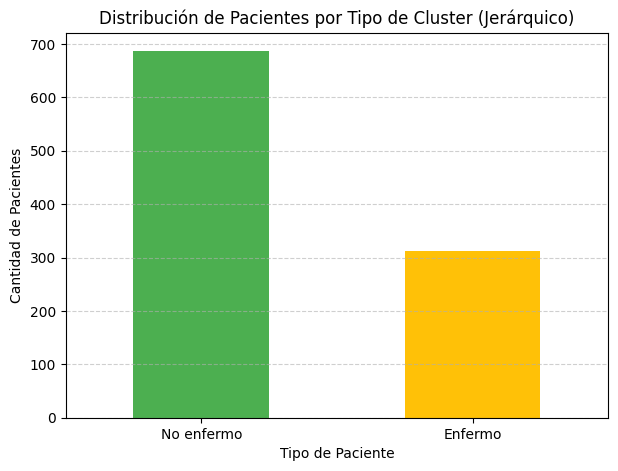

In [ ]:
plt.figure(figsize=(7, 5))
counts_h.plot(kind='bar', color=['#4CAF50', '#FFC107'])
plt.title('Distribución de Pacientes por Tipo de Cluster (Jerárquico)')
plt.xlabel('Tipo de Paciente')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Hierarchical Clustering (No Escalado)

In [ ]:
modelo_h_ns = AgglomerativeClustering(n_clusters=2,linkage='ward' )

inicio = time.time()
modelo_h_ns.fit(X)
fin = time.time()
print(f"Tiempo de entrenamiento: {(fin - inicio):.4f} segundos")

Tiempo de entrenamiento: 0.0348 segundos


In [ ]:
df["Cluster_h_ns"] = modelo.labels_
print("\nPrimeros 10 pacientes con su cluster asignado:")
print(df[["patientid", "Cluster_h_ns"]])


Primeros 10 pacientes con su cluster asignado:
     patientid  Cluster_h_ns
0       103368             0
1       119250             0
2       119372             0
3       132514             0
4       146211             0
..         ...           ...
995    9949544             1
996    9953423             0
997    9965859             1
998    9988507             1
999    9990855             0

[1000 rows x 2 columns]


# Gráficos

In [ ]:
cluster_map_h_ns = {
    0: "No enfermo",
    1: "Enfermo",
}
df['clusterlabel_ns'] = df["Cluster_h_ns"].map(cluster_map_h_ns)

#Contar cantidad de pacientes
counts_h_ns = df['clusterlabel_ns'].value_counts()

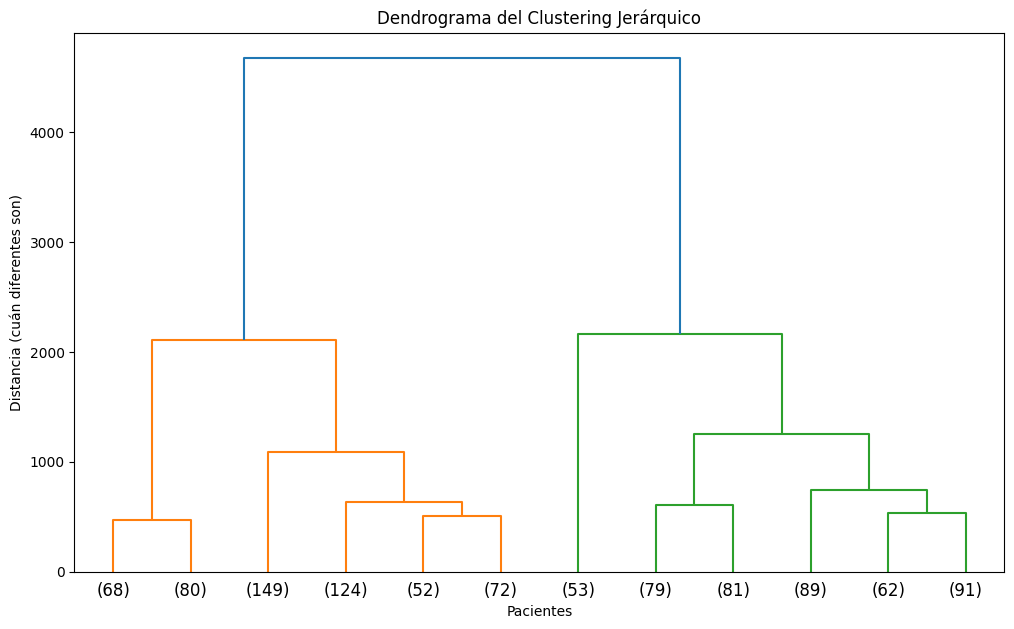

In [ ]:
#Esto genera los datos para el gráfico del árbol
Z = linkage(X, method='ward')

#Grafico del dendrograma
plt.figure(figsize=(12, 7))
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Pacientes')
plt.ylabel('Distancia (cuán diferentes son)')

# 'truncate_mode='lastp'' y 'p=12' es para no mostrar los 1000 pacientes,
# sino solo las últimas 12 "uniones" (si no, el gráfico es ilegible, xd)
dendrogram(Z,
           truncate_mode='lastp',  # Muestra solo las últimas 'p' uniones
           p=12,                   # Número de uniones a mostrar
           show_leaf_counts=True,  # Muestra cuántos pacientes hay en cada hoja
           leaf_font_size=12.)

plt.show()

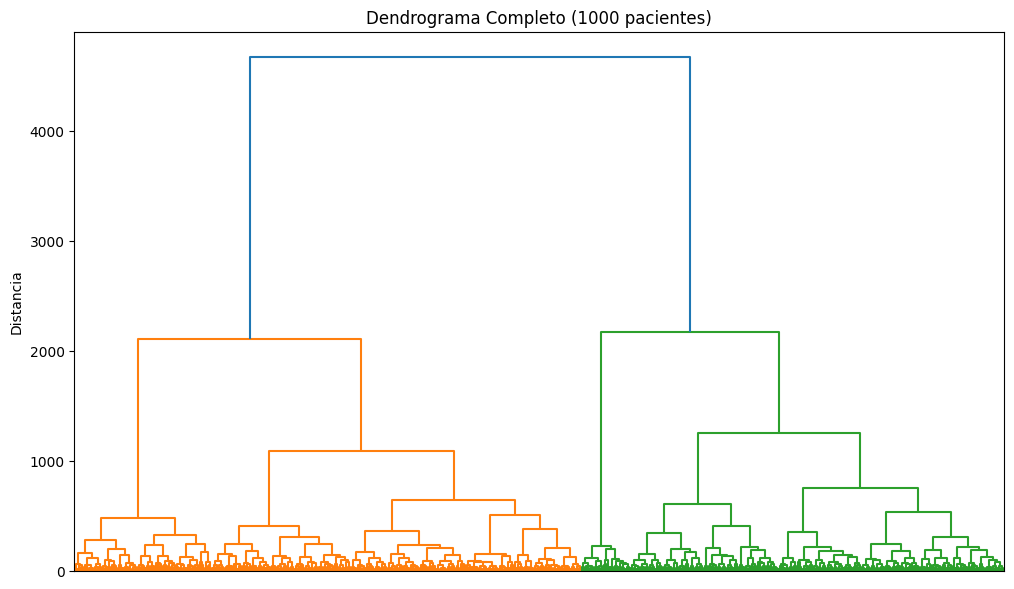

In [ ]:
#Graficar los 1000
plt.figure(figsize=(12, 7))
plt.title('Dendrograma Completo (1000 pacientes)')
plt.ylabel('Distancia')

dendrogram(Z,
           no_labels=True)

plt.show()

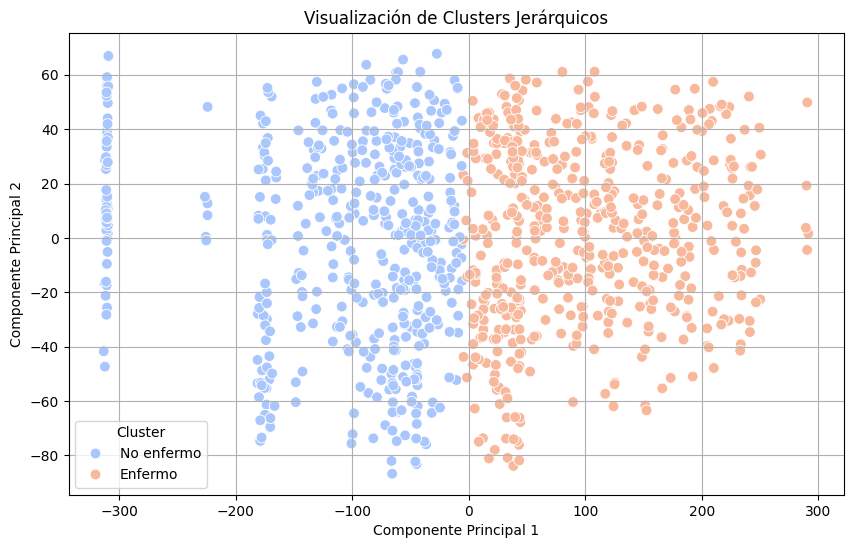

In [ ]:
# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=df["clusterlabel_ns"],
    palette="coolwarm",
    s=60
)

plt.title('Visualización de Clusters Jerárquicos')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

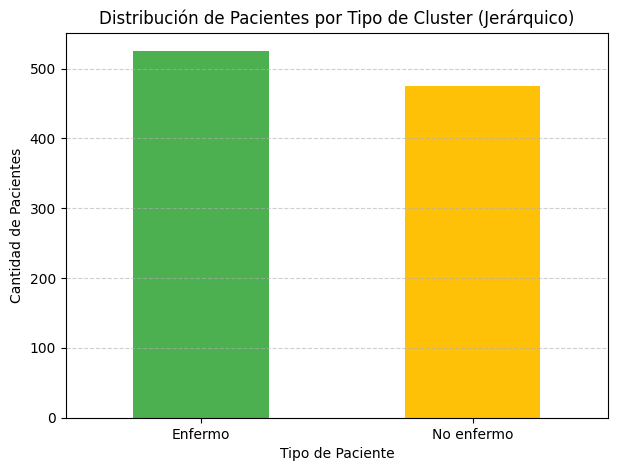

In [ ]:
plt.figure(figsize=(7, 5))
counts_h_ns.plot(kind='bar', color=['#4CAF50', '#FFC107'])
plt.title('Distribución de Pacientes por Tipo de Cluster (Jerárquico)')
plt.xlabel('Tipo de Paciente')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Conclusión


Notamos que la mejor opción en nuestro caso para predicción es usar el modelo KMeans *con escalado*, por otro lado no nos fue tan útil el modelo Hierarchical Clustering ya que dicho modelo es más óptimo en escenarios con menos volumen de Dataset.

Usamos escalado para que la distancia refleje similitudes reales entre los pacientes, ya que si una variable tiene valores mucho más grandes que otra *(por ejemplo, edad en años frente a colesterol o frecuencia cardíaca)*, esa variable domina el cálculo de distancia y puede distorsionar totalmente los clústeres.

##comparación de modelos


KMEANS (escalado): Tiempo de entrenamiento: 0.0644 segundos

Hierarchical Clustering (escalado): Tiempo de entrenamiento: 0.0568 segundos

**Diferencia mínima**

##Casos de uso generales

###KMeans


**Agrupamiento de usuarios por comportamiento en videojuegos o apps**

*Ejemplo:* clasificar jugadores según tiempo de juego, nivel promedio y logros.

*Motivo:* permite definir perfiles de usuarios y ajustar la dificultad o recompensas.

**Segmentación de clientes o usuarios (marketing, retail, etc.)**

Permite identificar grupos de consumidores con comportamientos de compra o uso similares.

*Ejemplo:* separar usuarios en “frecuentes”, “ocasionales” y “nuevos”

###Hierarchical Clustering

**Agrupamiento de documentos o textos similares**

*Ejemplo:* organizar artículos, correos o noticias por temas, sin saber cuántos grupos hay.

*Motivo:* el dendrograma permite ajustar el número de clusters después de ver la estructura.

**Agrupación de canciones o artistas según características acústicas**

*Ejemplo:* agrupar música por tono, ritmo o energía percibida.

*Motivo:* el dendrograma permite descubrir subgéneros o estilos derivados.

# FIN